### Thinkful exercise 3.2.6 - Challenge. Compare single decision tree to random forest using runtime

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Source of dataset: Kaggle "Diamonds" https://www.kaggle.com/shivam2503/diamonds

#### My objective: Learn to run and interpret decision tree and random forest regressors (Thinkful examples are classifiers only)

#### Resources 

Timing a cell in a Jupyter notebook - https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Decision tree regressor example - https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

Random forest regressor example 1 - https://www.kaggle.com/dfitzgerald3/randomforestregressor


Random forest regressor example 2 - https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

The Kaggle kernel by Chimnay Rane (https://www.kaggle.com/fuzzywizard/diamonds-in-depth-analysis) goes through multiple model comparisons and was the source of some of my material (such as his method of reporting results).

My own notebook with EDA of the diamonds dataset is called "3_1_4_model_comparison".

In [73]:
diamonds = pd.read_csv('../../Datafiles/unit_3/diamonds.csv')

In [74]:
#Drop the column Unnamed; it has no use
diamonds = diamonds.drop(columns = 'Unnamed: 0', axis = 1)

In [75]:
#Rename some columns for clarity
diamonds = diamonds.rename(columns = {'x':'length_mm', 'y':'width_mm', 'z':'depth_mm', 'depth':'depth_pcnt'})

In [76]:
#Confirming there are no null values present
diamonds.isnull().values.any()

False

In [77]:
#Drop 20 rows with illogical values (non-zero table or width percentage; )
diamonds = diamonds[(diamonds[['width_mm', 'length_mm', 'depth_mm']] != 0).all(axis=1)]

In [78]:
#Reduce the number of features by creating a single volume feature
diamonds['vol_mm'] = diamonds.width_mm * diamonds.length_mm * diamonds.depth_mm
diamonds = diamonds.drop(columns = {'width_mm', 'length_mm', 'depth_mm'}, axis = 1)

In [79]:
diamonds_encoded = pd.get_dummies(data=diamonds)

In [80]:
diamonds_target = diamonds['price']
diamonds_features = diamonds_encoded.drop(columns = 'price', axis = 1 )

In [82]:
#Describing the price (target variable)
diamonds_target.describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

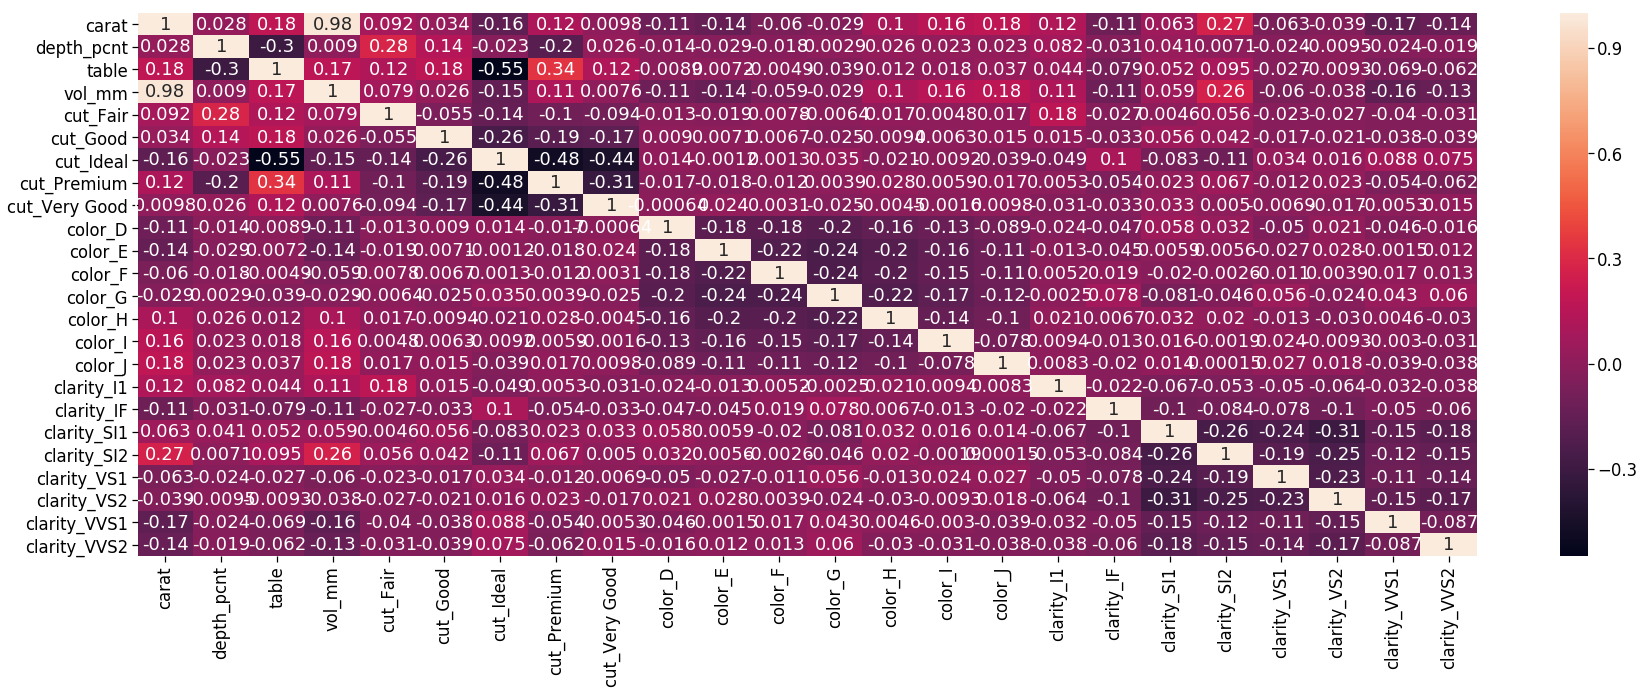

In [61]:
#Correlation between variables
plt.rcParams['figure.figsize'] = (30.0, 10.0)
features_corr = diamonds_features.corr()
sns.heatmap(data=features_corr, annot=True)

In [83]:
#Volume is highly correlated to carat weight, as we would suspect. Drop volume
diamonds_features = diamonds_features.drop(columns = 'vol_mm', axis = 1 )

In [84]:
#Do train-test split
X = diamonds_features
y = diamonds_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43136, 23) (43136,)
(10784, 23) (10784,)


In [87]:
#Scale the numeric features
scaler = StandardScaler()

#Improvement: Loop over the data frame columns and populate a numeric columns list by testing the data type
num_cols = ['carat', 'depth_pcnt', 'table']

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), index = X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), index = X_test.index)

In [88]:
X_train = pd.concat([X_train, X_train_num], axis = 1)
X_test = pd.concat([X_test, X_test_num], axis = 1)

In [90]:
X_train.rename(columns={0:'carat_sc', 1:'depth_pcnt_sc', 2: 'table_sc'}, inplace=True)
X_test.rename(columns={0:'carat_sc', 1:'depth_pcnt_sc', 2: 'table_sc'}, inplace=True)

In [97]:
X_train.drop(columns = num_cols, inplace = True)
X_test.drop(columns = num_cols, inplace = True)

KeyError: "['carat' 'depth_pcnt' 'table'] not found in axis"

In [94]:
X_train.columns

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2',
       'carat_sc', 'depth_pcnt_sc', 'table_sc'],
      dtype='object')

In [ ]:
X_test.columns

#### Decision tree regressor

In [95]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01) # sleep for 0.01 seconds
    
tree_regr = DecisionTreeRegressor(max_depth = 5)
tree_regr.fit(X_train, y_train)

cv_score = cross_val_score(tree_regr, X_train, y_train, cv=10)

y_pred = tree_regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Decision Tree Regressor')
print('')
print('Score : %.4f ' % tree_regr.score(X_test, y_test))
print('')
print(cv_score)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

Decision Tree Regressor

Score : 0.9102 

[ 0.91272368  0.91651414  0.9135483   0.90560553  0.9102295   0.91437975
  0.90820519  0.90907472  0.91467134  0.90774561]

MSE    : 1425996.20 
MAE    : 660.61 
RMSE   : 1194.15 
R2     : 0.91 
CPU times: user 602 ms, sys: 54.5 ms, total: 657 ms
Wall time: 12.7 s


#### Random forest regressor

n_estimators is the number of trees in the forest; 100 is the default

In [96]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01) # sleep for 0.01 seconds

forest_regr = RandomForestRegressor(n_estimators=100, max_depth = 5, n_jobs=-1)
forest_regr.fit(X_train, y_train)
cv_score = cross_val_score(forest_regr, X_train, y_train, cv = 10)

print('Random Forest Regressor')
print('')
print('Score : %.4f' % forest_regr.score(X_test, y_test))
print(cv_score)

y_pred = forest_regr.predict(X_test)
feature_imp = forest_regr.feature_importances_
print(feature_imp)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

Random Forest Regressor

Score : 0.9162
[ 0.91857994  0.92259496  0.92028199  0.91339065  0.91624871  0.92315461
  0.91504993  0.91518514  0.92044115  0.91438858]
[  5.50165008e-06   0.00000000e+00   2.15075198e-04   0.00000000e+00
   0.00000000e+00   9.85240065e-05   2.65870796e-06   3.77117378e-08
   7.52767853e-06   5.70441643e-06   3.95597848e-07   4.79749810e-03
   1.41849186e-02   1.75285454e-04   1.12904747e-02   2.06441155e-02
   0.00000000e+00   0.00000000e+00   3.89505567e-04   1.72359199e-03
   9.46439676e-01   1.91585556e-05   3.50344042e-07]

MSE    : 1330187.52 
MAE    : 640.86 
RMSE   : 1153.34 
R2     : 0.92 
CPU times: user 10.6 s, sys: 663 ms, total: 11.3 s
Wall time: 29.4 s


### Discussion

Runtime analysis: A single decision tree ran 820 ms, while a random forest with 100 estimators ran 12.3 s (12,300 ms). The random forest model took about 15 times longer than the single decision tree. There must be some constant overhead, because the random forest with 100 estimators did not take 100 times as long as a single decision tree.

The random forest regressor performed best in the Kaggle kernel that I used for reference. The score using 5 folds was 0.9820.

Other examples that I referred to (including the Kaggle kernel) used Grid Search to choose the estimators and the number of nodes to traverse (depth). Would this make a difference in my results? I need to review the purpose and function of Grid Search.

What would happen if I got dropped (or somehow normalized) the larger stones that skew the data? 

Should I re-state the price (target) as per carat? If I did that and then dropped the carat weight feature, I would be examining the question what factors other than size influence the price of a diamond, and how is each feature weighted?

Both models seem overfit to me. Why?